# 911 Calls Capstone Project

**For this capstone project we will be analyzing some 911 call data from [Kaggle]**(https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

In [103]:
## Data and Setup

In [104]:
import pandas as pd
import numpy as np

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [106]:
df=pd.read_csv('911.csv')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [108]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

In [109]:
# The top 5 zipcodes for 911 calls :

In [110]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [111]:
# the top 5 townships (twp) for 911 calls :

In [112]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [113]:
# Number of unique values in 'title' of emergency



In [114]:
df['title'].nunique()

110

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.**
**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [115]:
df ['Reason']=df['title'].apply(lambda title: title.split(':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [116]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

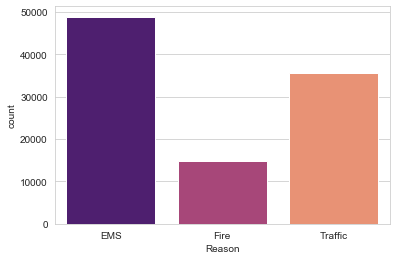

In [117]:
sns.countplot(x='Reason',data=df,palette='magma')

**Converting timestamps from strings to DateTime objects.**

In [118]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

**Creating new columns Hour, Month,Day of week and Date from timeStamp column.**



In [119]:
df['Hour']=df['timeStamp'].apply(lambda time: time.hour)
df['Month']=df['timeStamp'].apply(lambda time: time.month)
df['Day']=df['timeStamp'].apply(lambda time: time.dayofweek)

**Coverting 'Day of Week' from numbers to words**


    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [120]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [121]:
df['Day']=df['Day'].map(dmap)

  **Creating a countplot of the Day of Week column with the hue based off of the Reason column.**

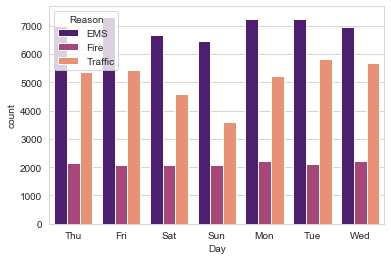

In [122]:
sns.countplot(x='Day',data=df,hue='Reason',palette='magma')

**the same for Month:**

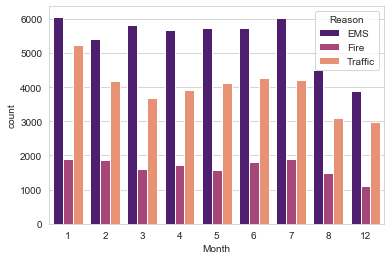

In [123]:
sns.countplot(x='Month',data=df,hue='Reason',palette='magma')

**Note**
_____

There is something strange in this plot. 9, 10 and 11th months are missing from the data. I tired using groupby method and lineplot to get rough estimate of the missing months

In [124]:
byMonth=df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Creating a simple plot off of the dataframe indicating the count of calls per month. **

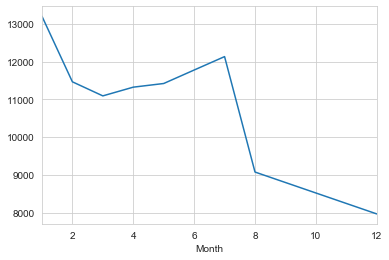

In [125]:
byMonth['twp'].plot()

**using seaborn's lmplot() to create a linear fit on the number of calls per month**

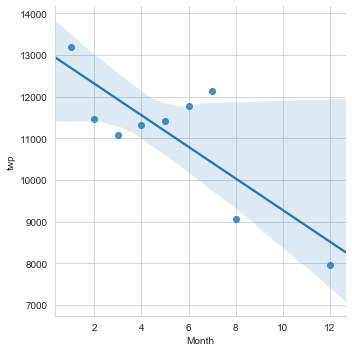

In [126]:
sns.lmplot(x="Month",y="twp",data=byMonth.reset_index())

**Creating a new column called 'Date' that contains the date from the timeStamp column.** 

In [129]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())


** Implementing "groupby" to this Date column with the count() aggregate and creating a plot of counts of 911 calls.**

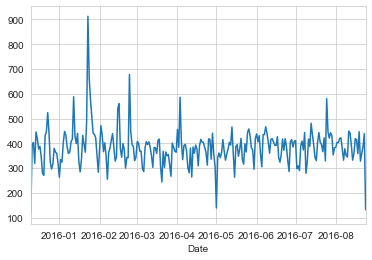

In [130]:
df.groupby('Date').count()['twp'].plot()



** Recreating this plot while create 3 separate plots with each plot representing a Reason for the 911 call**

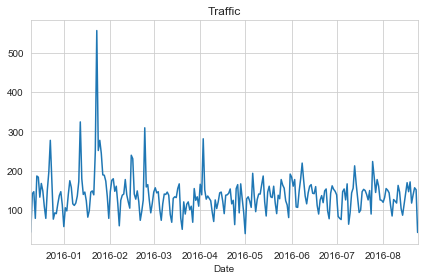

In [131]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

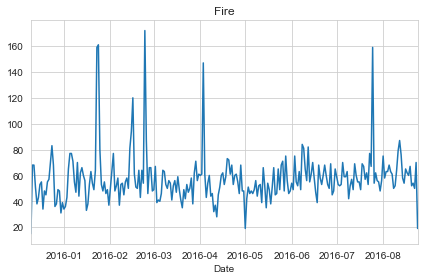

In [132]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

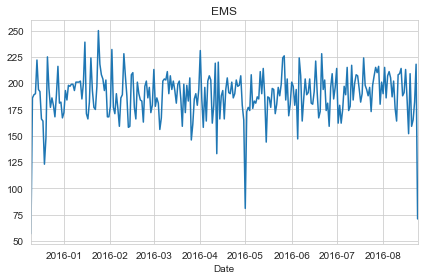

In [133]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
**creating  heatmaps with seaborn and our data.**

In [134]:
dayHour = df.groupby(by=['Day','Hour']).count()['e'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Creating a HeatMap using this new DataFrame. **

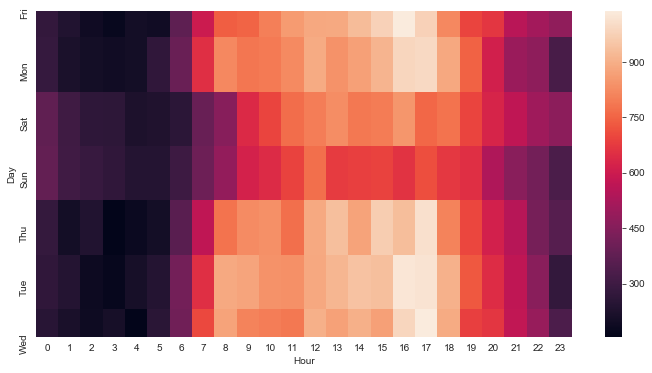

In [135]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

**Creating a clustermap using this DataFrame. **

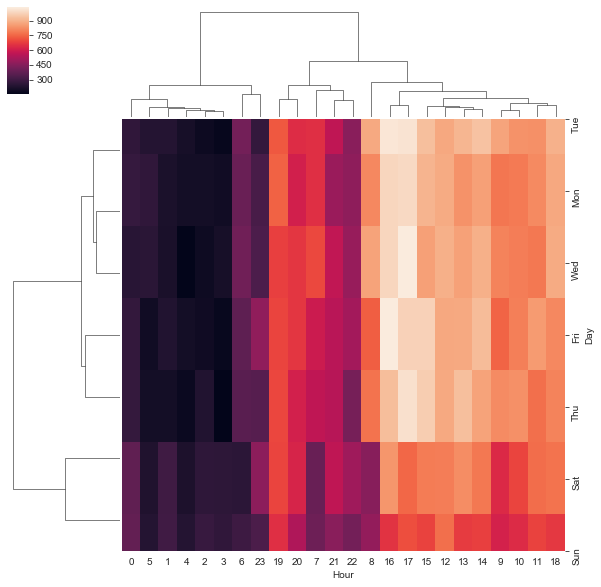

In [136]:
sns.clustermap(dayHour)

**showing the Month as the column. **

In [137]:
dayMonth = df.groupby(by=['Day','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


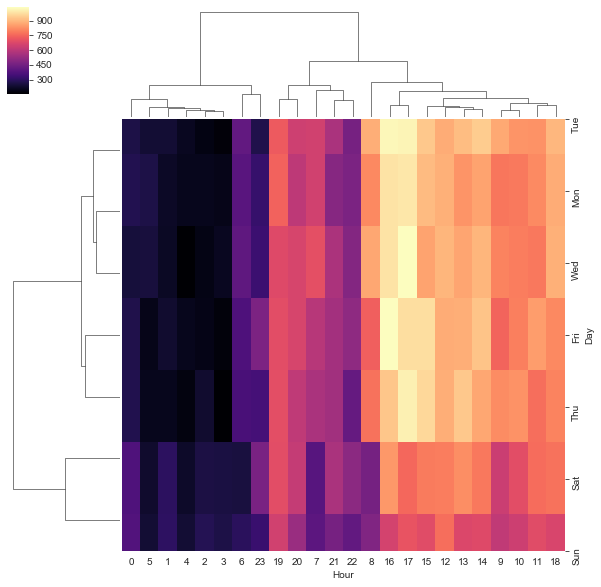

In [139]:
sns.clustermap(dayHour,cmap='magma')
